# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308860,0.496087,0.259654,0.275845,0.171676,0.278926,0.410143,0.442838,0.361775,0.371302
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [6]:
data.columns

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')

race
b    157.0
w    235.0
Name: call, dtype: float32


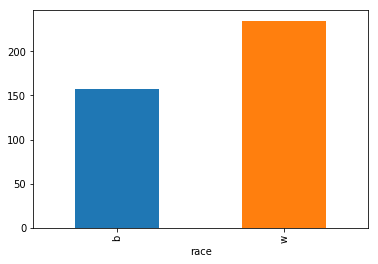

In [7]:
print(data.groupby('race').call.sum())
data.groupby('race').call.sum().plot(kind='bar')

# 1. What test is appropriate for this problem? Does CLT apply?

Although the sample size is sufficient, a T-test would be best as the population standard deviation is unknown.
The central limit theorem applies as it satisfies the requirements for CLT:
<br>a) identical resumes were randomly assigned names
<br>b) the sample size of 4870 is less than the population (i.e., all black and white people that would apply for jobs in Chicago and Boston
<br>c) np >= 10 and nq >= 10:  4870 * 0.5 = 2435 >= 10


# 2. What are the null and alternate hypotheses?
The null hypothesis is that there is no difference between the average number of call backs received for resumes with black ($\mu_b$) sounding names and white sounding names ($\mu_b$).

$H_0: \mu_b = \mu_w $

The alternate hypothesis is that there is a racial bias and resumes with black sounding names get less call backs

$H_0: \mu_b < \mu_w $

# 3. Compute margin of error, confidence interval, and p-value.
We compute sample proportions of call backs for resumes with black names and white names. 

In [93]:
b = data[data.race == 'b']
w = data[data.race == 'w']

p_b = b.call.mean()
p_w =  w.call.mean()
var_b = p_b*(1 - p_b)/n_b
var_w = p_w*(1 - p_w)/n_w
sigma = np.sqrt(var_b + var_b)
n_b = len(b)
n_w = len(w)
mu = p_w - p_b

print("Sample proportion of sampling distribution = ", mu)
print("Sample standard deviation of sampling distribution = ", sigma)


Sample proportion of sampling distribution =  0.032032855
Sample standard deviation of sampling distribution =  0.007038712629519212


The margin of error for 95% confidence interval for the difference in sample proportions for resumes with black names and white names is calculated below.

In [65]:
z = 1.96 #for 95% CI
MOE = z * sigma

print("Margin of error of call backs for resumes with black sounding names = ", MOE)

Margin of error of call backs for resumes with black sounding names =  0.013795876753857655


In [94]:
CI = [(mu) - MOE, (mu + MOE)]
print("Confidence interval for proportion of resumes receive call backs = \n", CI)

Confidence interval for proportion of resumes receive call backs = 
 [0.018236978101202922, 0.04582873160891823]


For comparison, the two sample sampling proportion, std dev, margin of error and 95% confidence interval is calculated below. The results are close to the estimation above, but not an exact match.

In [79]:
def draw_bs_reps_2samples(x,y, func, size=1):
    """Perform pairs bootstrap for linear regression and return single test statistics."""

    # Set up array of indices to sample from: inds
    inds_x = np.arange(len(x))
    inds_y = np.arange(len(y))

    # Initialize replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_inds_x = np.random.choice(inds_x, size=len(inds_x))
        bs_inds_y = np.random.choice(inds_y, size=len(inds_y))
        bs_x, bs_y = x.iloc[bs_inds_x], y.iloc[bs_inds_y]
        bs_replicates[i] = func(bs_x) - func(bs_y)

    return bs_replicates

In [80]:
bs_reps = draw_bs_reps_2samples(w.call, b.call, np.mean, 10000)

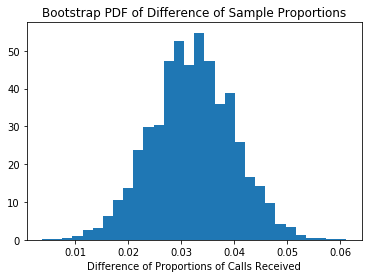

In [85]:
n_bins = 30
_ = plt.hist(bs_reps, bins=n_bins, density=True, label='black names')

plt.title('Bootstrap PDF of Difference of Sample Proportions')
_ = plt.xlabel('Difference of Proportions of Calls Received')



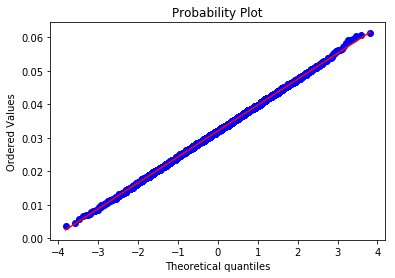

In [86]:
import pylab 
import scipy.stats as stats
  
stats.probplot(bs_reps, dist="norm", plot=pylab)
pylab.show()

In [91]:
print("Bootstrap sample proportion = ", bs_reps.mean())
print("Bootstrap sample std dev = ", bs_reps.std())
print("Bootstrap sample margin of error = ", 1.96 * bs_reps.std())
print("Bootstrap 95% confidence interval = ", np.percentile(bs_reps,[2.5, 97.5]))

Bootstrap sample proportion =  0.032040205477923155
Bootstrap sample std dev =  0.007739881782230777
Bootstrap sample margin of error =  0.015170168293172323
Bootstrap 95% confidence interval =  [0.01683778 0.04722793]


Due to the large sample size, a Z-test is conducted. The Z-score is calculated by calculating the difference between assumed sampling proportion from the null hypothesis ($\mu_w$ - $\mu_b$, `null_mu` = $\mu_w$ - $\mu_b$ = 0) and the sampling proportion (`mu` = $\mu_w$ - $\mu_b$), and divided by the sampling std dev assuming the null hypothesis is true. The p-value is then calculated from the Z-score. A one tail test is used for p-value as we are concerned with whether or not the resumes with black sounding names receive less call backs than resumes with white sounding names.

In [117]:
null_mu = 0
p = (b.call.sum() + w.call.sum()) / (len(b.call) + len(w.call))
null_sigma = np.sqrt( (p * (1-p)/ n_w ) + (p * (1-p)/ n_b ) )
z = (mu - null_mu)/null_sigma
p_value = stats.norm.sf(abs(z))

print("The p value is ", p_value)

The p value is  1.991942704752209e-05


# 4. Write a story describing the statistical significance in the context or the original problem.


The results of the study showed that the proportion of resumes with black sounding names that received call backs is less than the proportion of call backs for resumes with white sounding names. The very low p-value from the two sample hypothesis test suggest that the observations from the study are statistically significant. In other words, it is unlikely that it is merely a coincidence that resumes with black sounding names are getting less call backs than resumes with white sounding names.

# 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

No. The results of the analysis only provide evidence that the observed disparity between call backs received for resumes with black sounding names compared to resumes with white sounding names is statistically significant. A resume can contain numerous bits of information that can influence the likelihood of a call back including education level, job experience, relevant skills, location, and gender. To conduct an experiment to determine the most important factor in call back success, the combination of all the other information provided in a resume would also have to be included in the analysis.